#  基于麦当劳菜单的营养成分可视化分析

首先导入数据集。

In [1]:
import csv
import os
filename='menu.csv'
with open(filename)as file:
    reader=csv.reader(file)
    header_row=next(reader)
    for index,column_header in enumerate(header_row):
        print(index,column_header)

0 Category
1 Item
2 Serving Size
3 Calories
4 Calories from Fat
5 Total Fat
6 Total Fat (% Daily Value)
7 Saturated Fat
8 Saturated Fat (% Daily Value)
9 Trans Fat
10 Cholesterol
11 Cholesterol (% Daily Value)
12 Sodium
13 Sodium (% Daily Value)
14 Carbohydrates
15 Carbohydrates (% Daily Value)
16 Dietary Fiber
17 Dietary Fiber (% Daily Value)
18 Sugars
19 Protein
20 Vitamin A (% Daily Value)
21 Vitamin C (% Daily Value)
22 Calcium (% Daily Value)
23 Iron (% Daily Value)


数据集来源于kaggle网站：https://www.kaggle.com/mcdonalds/nutrition-facts

读取表头，可知这个文件包含种类、食物、分量以及卡路里、脂肪等一共21种营养成分的数据。

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

#导入数据
menu = pd.read_csv('menu.csv')

数据分析和可视化使用到pandas、numpy、seaborn、matplotlib以及plotly库。

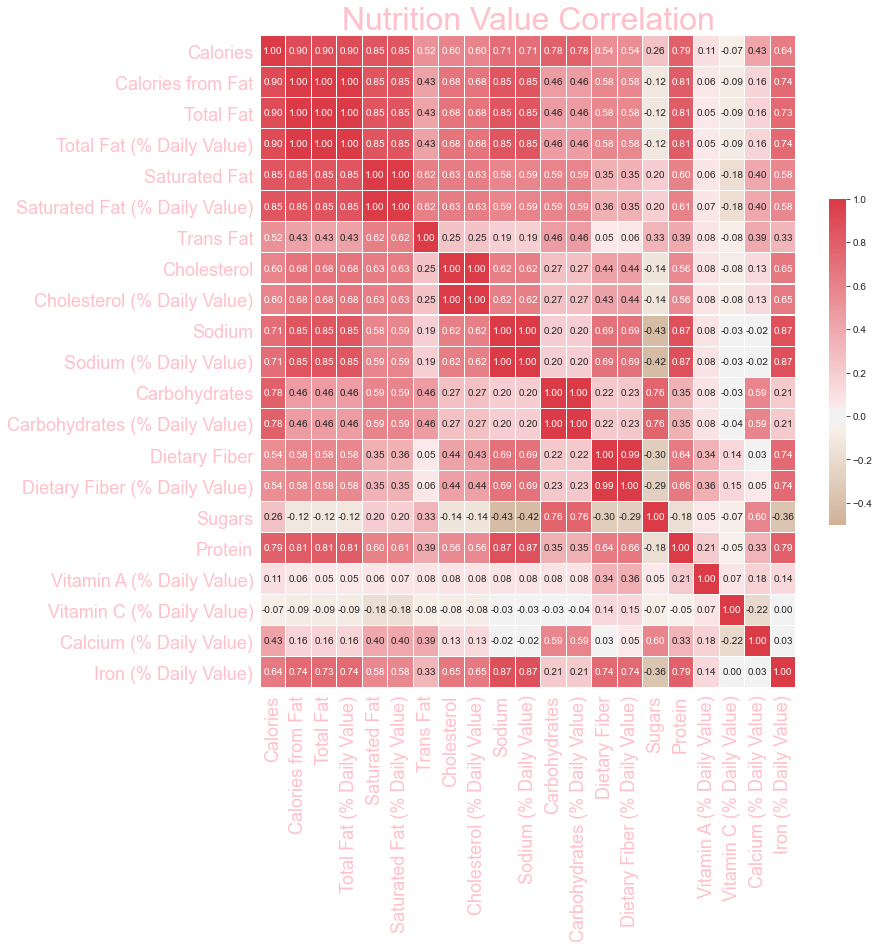

<Figure size 432x288 with 0 Axes>

In [3]:
from matplotlib import cm as cm

sns.set_style("whitegrid")
plt.figure(figsize = (12,12))
cmap = sns.diverging_palette(400,10, as_cmap = True)

sns.heatmap(menu[menu.columns[3:]].corr(), vmax = 1, vmin = -0.5, center = 0, cmap=cmap,
           annot = True, linewidth = 0.1, cbar_kws = {'shrink':.5}, fmt= '.2f')
plt.title("Nutrition Value Correlation", size = 32, color = 'Pink')
plt.xticks(color='Pink', size=18)
plt.yticks(color='Pink', size=18)

plt.show()

plt.savefig('heatmap.png')

数据中一共包含21中营养成分的信息，如果要一一进行可视化和分析，过程会很复杂冗长，并且重复性高，所以我决定先对各营养成分两两之间的相关性进行分析，这里采用到seaborn库中的heatmap（热力图）。
由于属性较多，上面这种热力图看起来还是不够清晰，有两个点可以帮助简化：
1. 可以明显发现矩阵中的数据有重复，比如'Total Fat'和'Total Fat (% Daily Value)'等，这很容易理解，因为后者是在前者的基础上与每日所需量的比值，因此在分析各营养成分两两之间的关系时不需将类似'Total Fat (% Daily Value)'的数据加入其中；
2. 这是一个对称矩阵，只需取一半即可。

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text major ticklabel objects>)

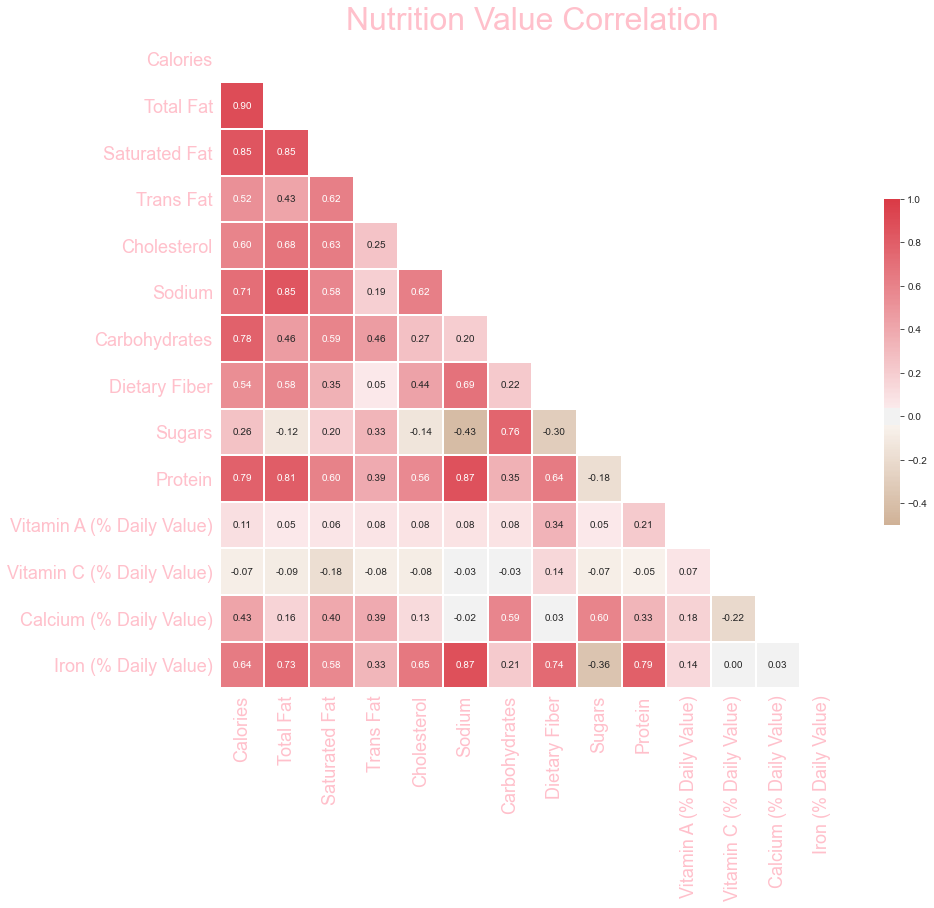

In [4]:
from matplotlib import cm as cm

sns.set_style("whitegrid")

cols = ['Calories','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein',
        'Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']
cm = np.corrcoef(menu[cols].values.T)

mask = np.zeros_like(cm, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (14,12))
cmap = sns.diverging_palette(400,10, as_cmap = True)

sns.heatmap(cm, mask=mask, vmax = 1, vmin = -0.5, center = 0, cmap=cmap,
           annot = True, linewidth = 1.0, cbar_kws = {'shrink':.5}, fmt= '.2f',
            xticklabels = cols, yticklabels = cols)
plt.title("Nutrition Value Correlation", size = 32, color = 'Pink')
plt.xticks(color='Pink', size=18)
plt.yticks(color='Pink', size=18)
#plt.savefig('Correlation Matrix'+'.png', bbox_inches = 'tight')

基于以上两点对热力图进行简化，得到如上图。
取出其中相关性>=0.75的数据，以便进行进一步的分析：
1. 卡路里 & 脂肪          0.90
2. 卡路里 & 饱和脂肪       0.85
3. 卡路里 & 碳水化合物      0.78
4. 卡路里 & 蛋白质         0.79
5. 脂肪 & 饱和脂肪         0.85
6. 脂肪 & 钠             0.85
7. 脂肪 & 蛋白质          0.81
8. 钠 & 蛋白质           0.87
9. 钠 & 铁（%每日所需）     0.87
10. 碳水化合物 & 糖        0.76
11. 蛋白质 & 铁（%每日所需   0.79
可以看出卡路里、脂肪、钠、蛋白质和铁（%每日所需）之间的相关性较大。

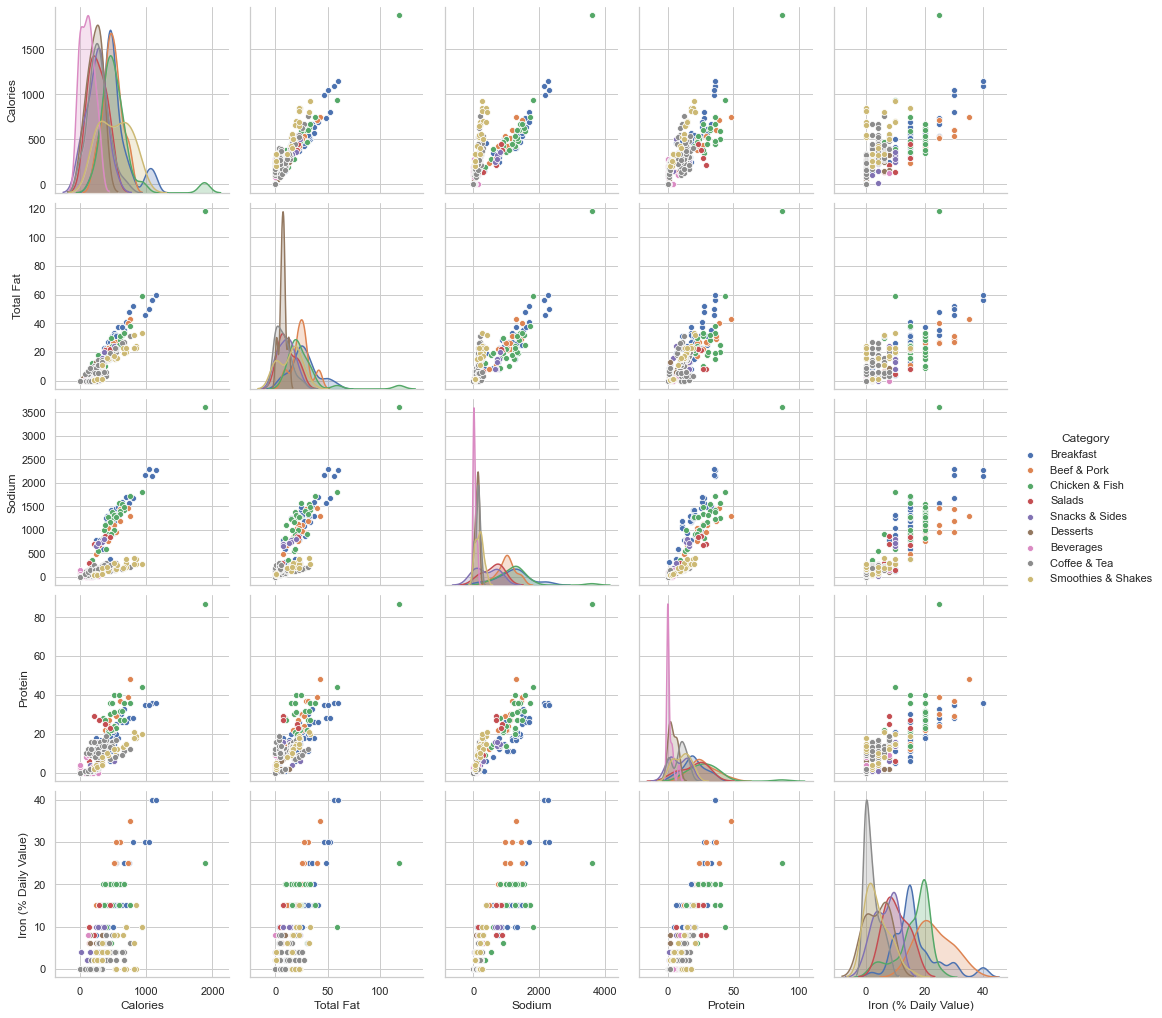

In [5]:
sns.set(style='whitegrid')
cols = ['Category','Calories', 'Total Fat', 'Sodium', 'Protein', 'Iron (% Daily Value)']
sns.pairplot(menu[cols], hue='Category', height=2.8)
plt.show()

为了更加直观地分析上述营养成分之间的关系，这里采用seaborn库中的pairplot图来进行展示。

 pairplot中pair是成对的意思，pairplot主要展现的是变量两两之间的关系（线性或非线性，有无较为明显的相关关系）。 

可以看出卡路里和脂肪之间存着明显的线性关系，且和食物类别没有太大关系；
而卡路里、脂肪、蛋白质和钠之间也存在着明显的线性关系，但是和食物类别有着较大关系。

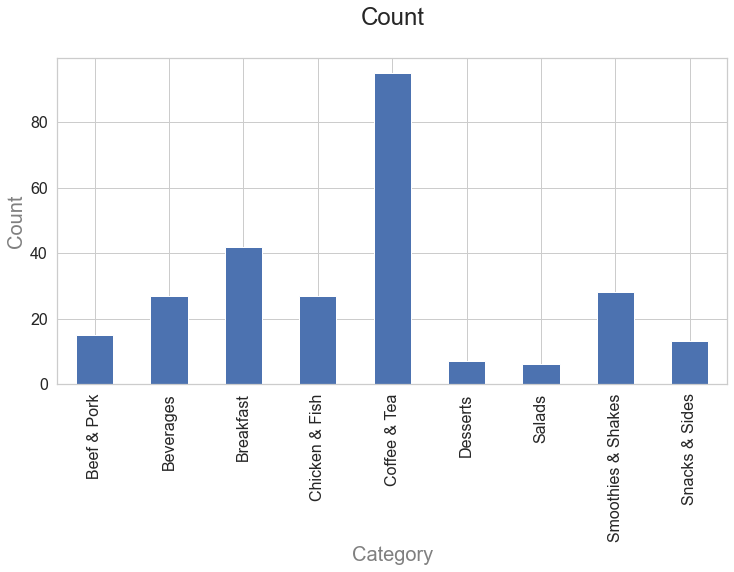

In [6]:
plt.figure(figsize=(12,6))
menu.groupby('Category')['Item'].count().plot(kind='bar')

plt.title("Count\n", size=24)
plt.xlabel('Category', color='gray', fontsize=20)
plt.ylabel('Count', color='gray', fontsize=20)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

由上柱状图可以看到咖啡茶类的提供的选择是最多的，远远超出其他种类食物。

普通的柱状图无法读取精确的数据，因此以下使用plotly设计可交互的柱状图，更便于读数据。

In [8]:
pyplt = py.offline.plot
x = menu['Category']
y = menu.groupby('Category')['Item'].count()
data = [go.Histogram(x=x)]

layout = go.Layout(
    title = 'Count',
    xaxis = {'title':'Category'}
)

fig = go.Figure(data, layout)

fig.show()

麦当劳提供了相当丰富的咖啡茶类，高达95种；其次是早餐，42种；然后是炸鸡炸鱼类、饮料类、冰沙奶昔类27，28种；牛肉猪肉类和小事均是十几种；甜点和沙拉类提供的选择是最少的，分别是7种和6种。

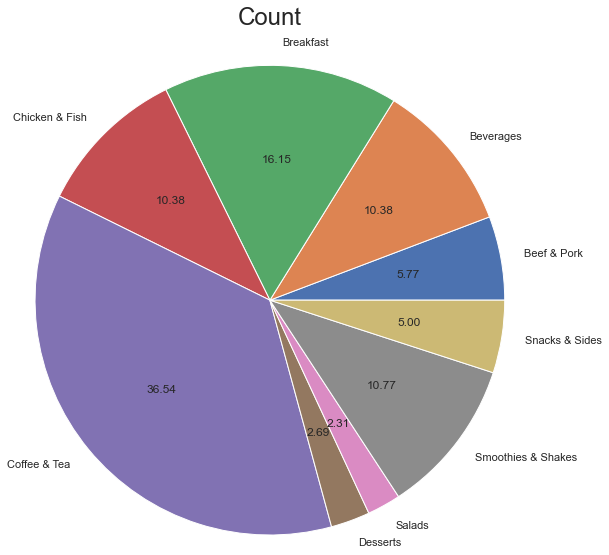

In [9]:
plt.figure(figsize=(12,6))
menu.groupby('Category')['Item'].count().plot(kind='pie', radius=1.8, autopct='%.2f')

plt.title("Count\n\n\n\n", size=24)
plt.gca().set_aspect('equal')

plt.show()

368.2692307692308
340.0


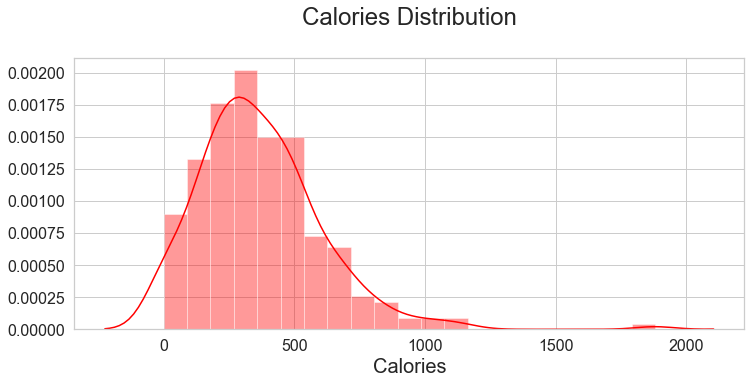

In [10]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Calories'], color='Red')

plt.title("Calories Distribution\n", size=24)
plt.xlabel('Calories', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu.Calories.mean())
print(menu.Calories.median())

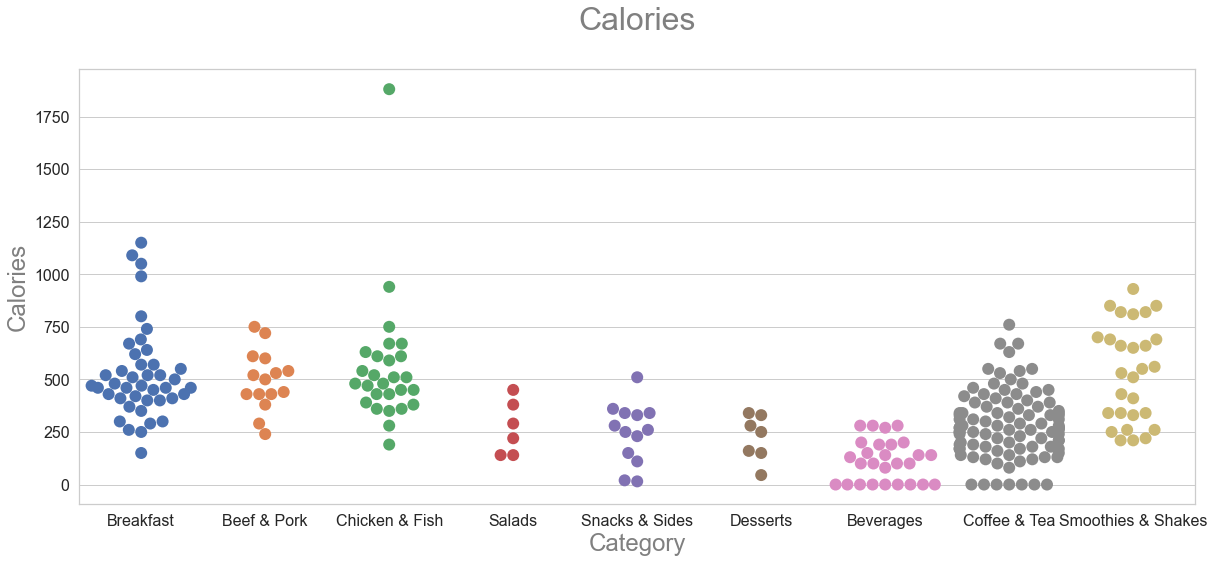

In [11]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Calories', data=menu, size=12)

plt.title("Calories\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Calories', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

再来看一下各种类的食物的热量分布情况，为了同时展示出各种类中食物热量的分布情况以及各种类之间热量的比较情况，这里采用的是seaborn库中的swarmplot图（分簇散点图）。

可以看到，结论：早餐、牛肉猪肉、炸鸡炸鱼类食物每一份的热量主要分布在250-750kcal之间，集中在500kcal附近，其中早餐和炸鸡中有几个离群点，是由于超额的分量造成的，可以忽视；而沙拉、小食、甜点的热量在250kcal左右；饮料类在0-250kcal之间；咖啡和茶类在0-750kcal之间，集中在250kcal上下；冰沙奶昔类是饮品中热量最高的一类，在250-800kcal之间浮动。
因此，如果一定要喝点什么的话，建议普通饮料和咖啡茶类，和奶昔类相比更不容易发胖。

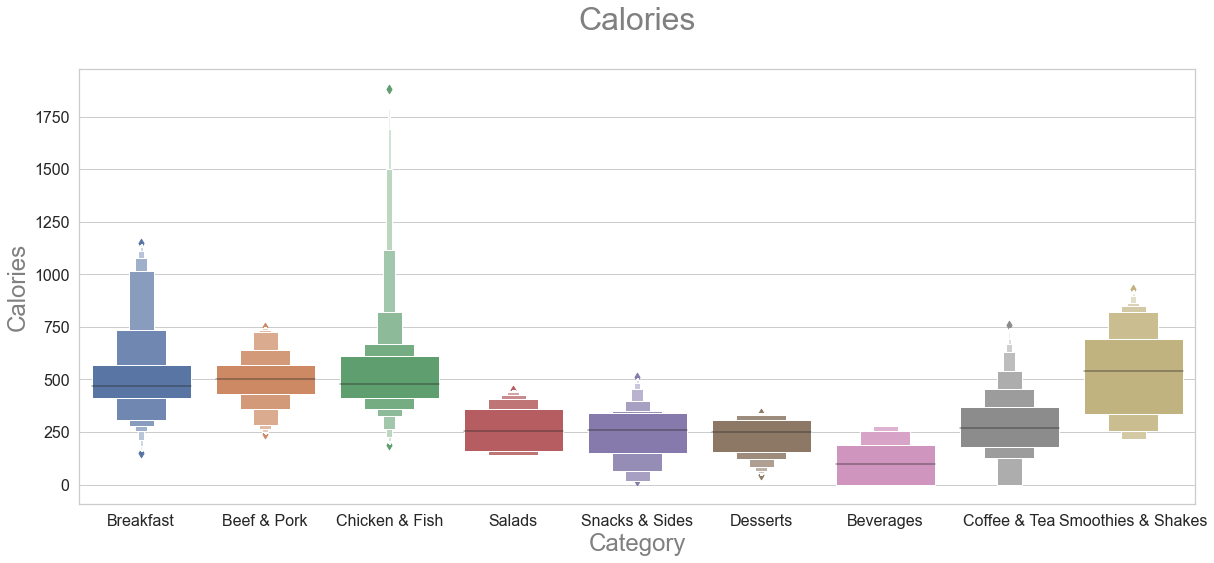

In [12]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Calories', data=menu)

plt.title("Calories\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Calories',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

14.165384615384616
11.0


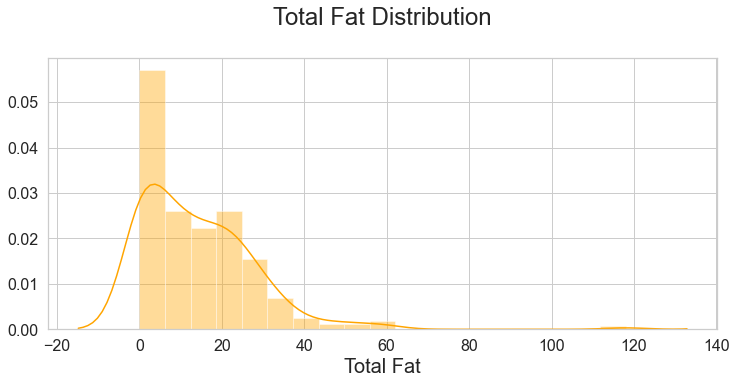

In [13]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Total Fat'], color='Orange')

plt.title("Total Fat Distribution\n", size=24)
plt.xlabel('Total Fat', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Total Fat'].mean())
print(menu['Total Fat'].median())

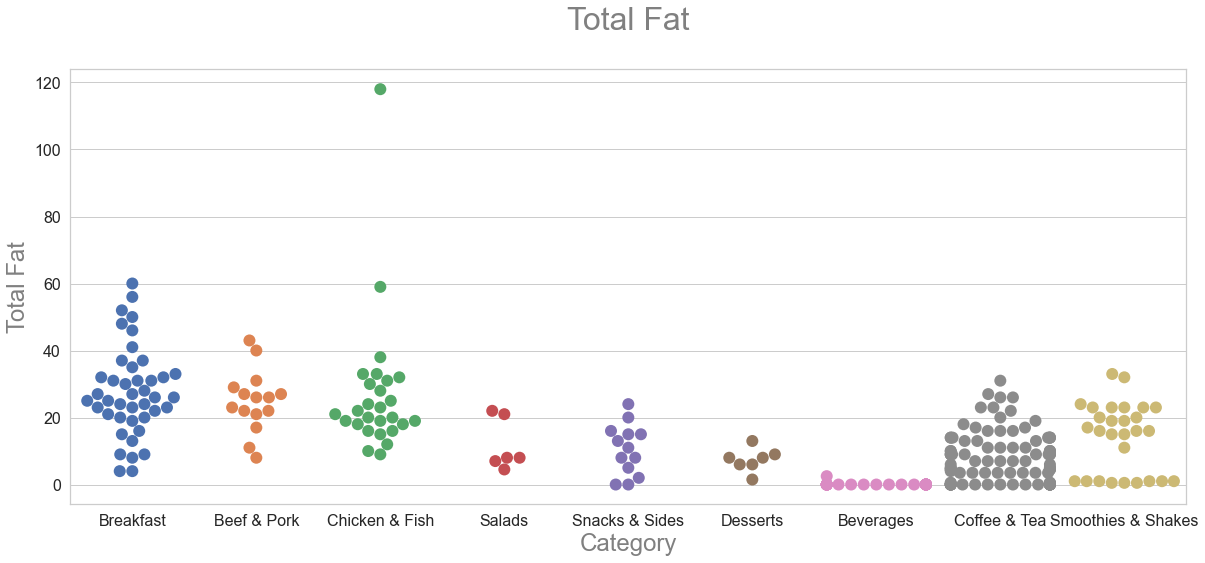

In [14]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Total Fat', data=menu, size=12)

plt.title("Total Fat\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Total Fat', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

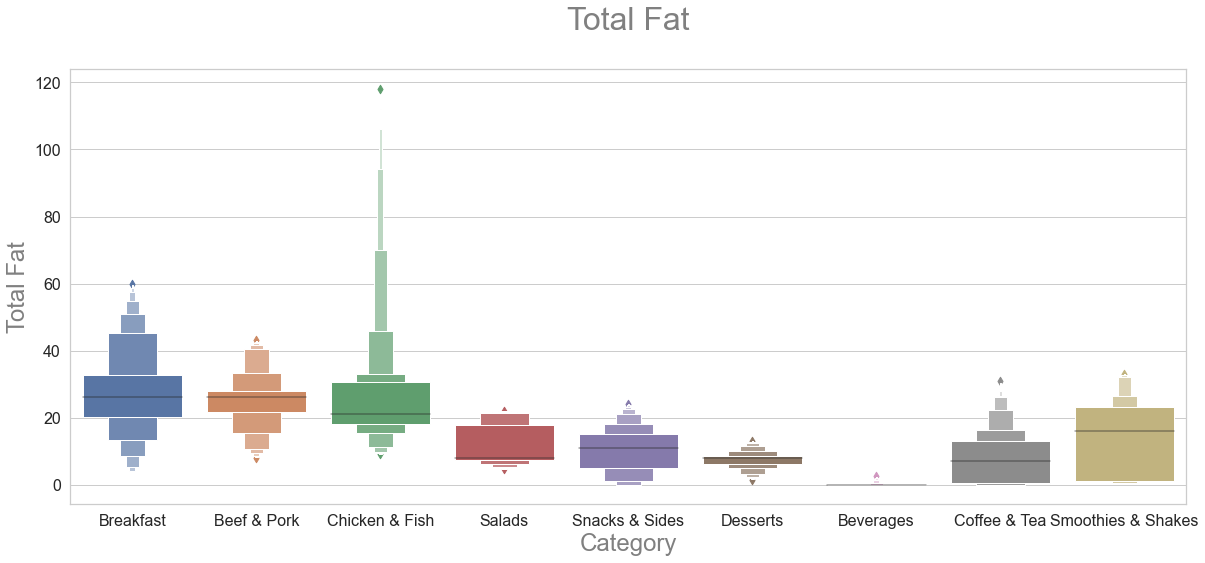

In [15]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Total Fat', data=menu)

plt.title("Total Fat\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Total Fat',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

可以看到各种类食物脂肪的分布情况和上面卡路里的分布情况非常类似，与之前热力图和散点图中得出的结论是相符的。

6.007692307692308
5.0


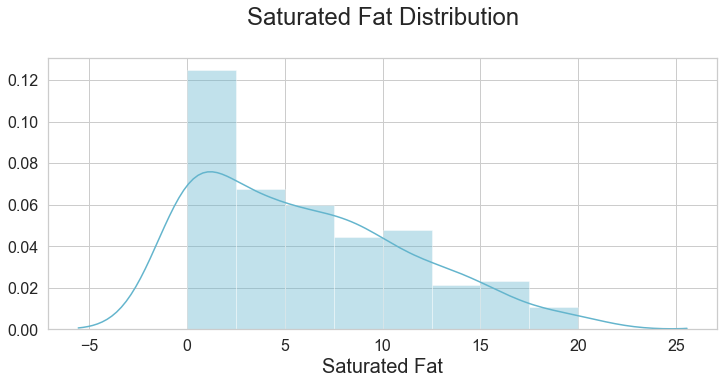

In [16]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Saturated Fat'], color='c')

plt.title("Saturated Fat Distribution\n", size=24)
plt.xlabel('Saturated Fat', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Saturated Fat'].mean())
print(menu['Saturated Fat'].median())

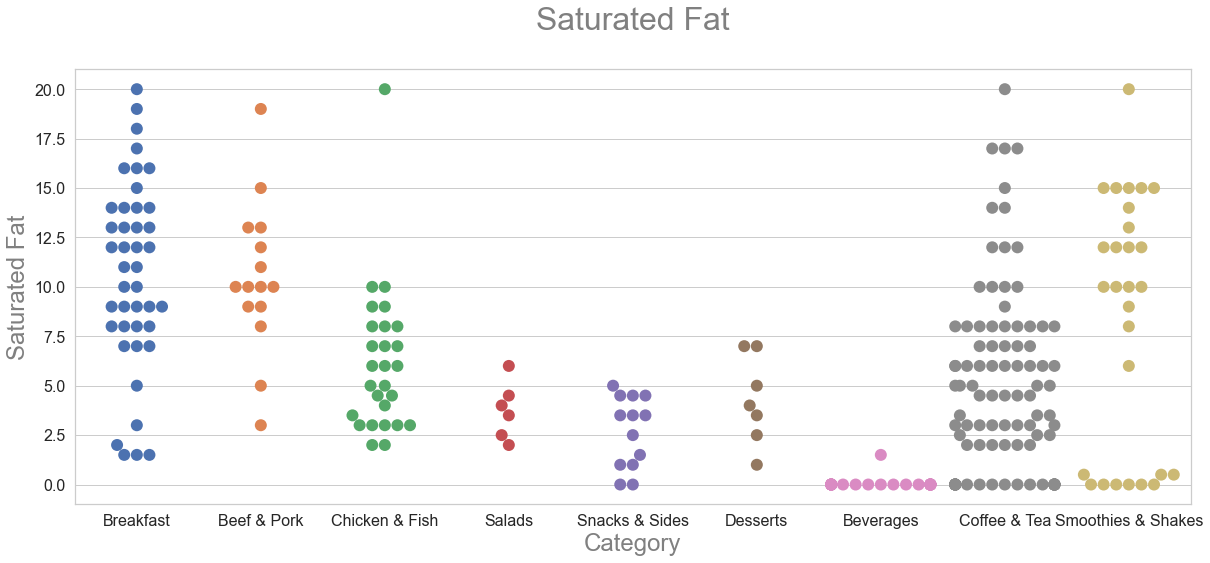

In [17]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Saturated Fat', data=menu, size=12)

plt.title("Saturated Fat\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Saturated Fat', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

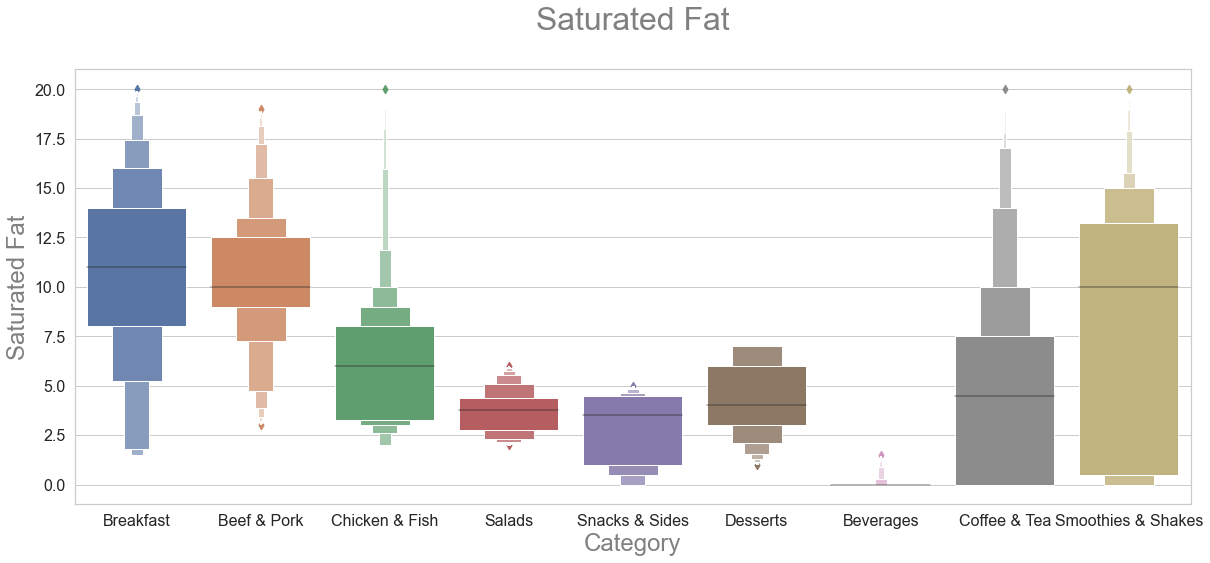

In [18]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Saturated Fat', data=menu)

plt.title("Saturated Fat\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Saturated Fat',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

饱和脂肪酸摄入量过高是导致血胆固醇、三酰甘油、低密度脂蛋白胆固醇（LDL-C）升高的主要原因，继发引起动脉管腔狭窄，形成动脉粥样硬化，增加患冠心病的风险。此类脂肪酸多含于牛、羊、猪等动物的脂肪中，有少数植物如椰子油、可可油、棕榈油等中也多含此类脂肪酸。
由上图可以看到早餐、牛肉猪肉、炸鸡炸鱼、咖啡茶类以及奶昔类含有饱和脂肪酸的含量偏高。

0.20384615384615384
0.0


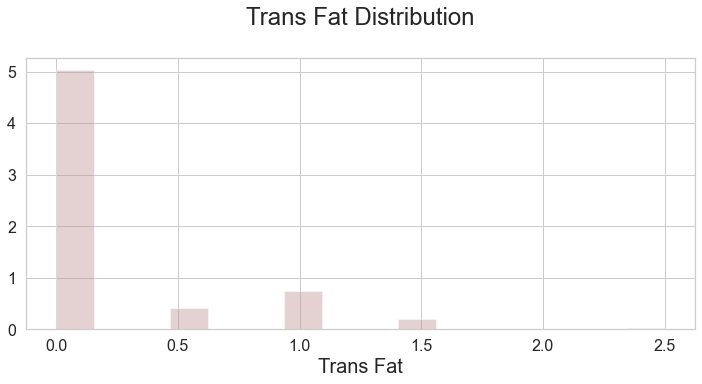

In [19]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Trans Fat'], color='rosybrown')

plt.title("Trans Fat Distribution\n", size=24)
plt.xlabel('Trans Fat', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Trans Fat'].mean())
print(menu['Trans Fat'].median())

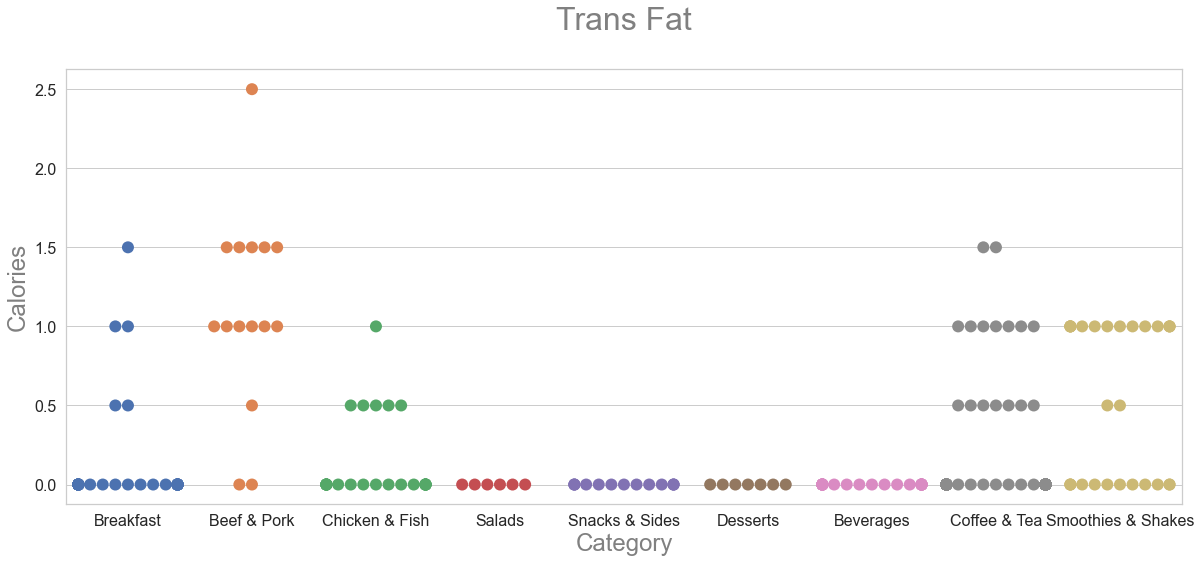

In [20]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Trans Fat', data=menu, size=12)

plt.title("Trans Fat\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Calories', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

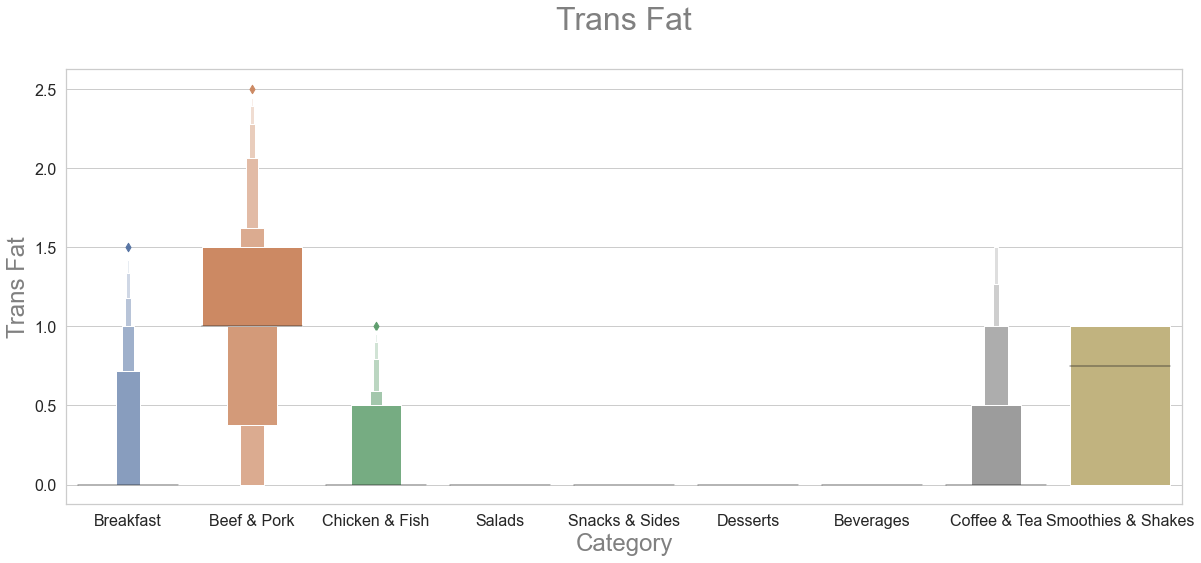

In [21]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Trans Fat', data=menu)

plt.title("Trans Fat\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Trans Fat',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

反式脂肪酸对健康非常不利，容易导致形成血栓、影响发育、影响生育、降低记忆、容易发胖、容易引发冠心病等。
由上图可以看到大部分牛肉猪肉类、咖啡茶类、奶昔类中含有反式脂肪酸水平较高，少部分早餐、炸鸡炸鱼也含有一定反式脂肪酸，应当少吃。

54.94230769230769
35.0


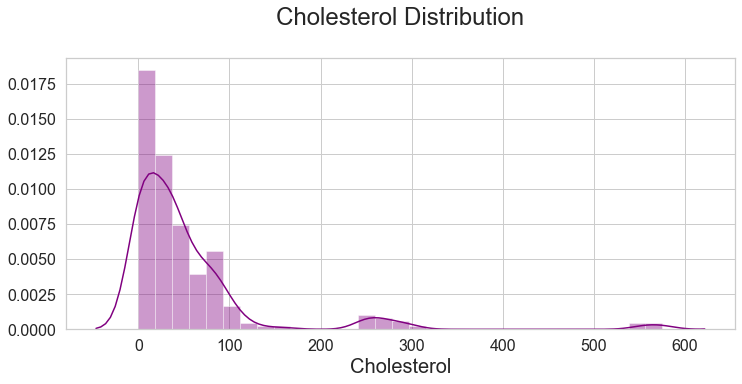

In [22]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Cholesterol'], color='purple')

plt.title("Cholesterol Distribution\n", size=24)
plt.xlabel('Cholesterol', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Cholesterol'].mean())
print(menu['Cholesterol'].median())

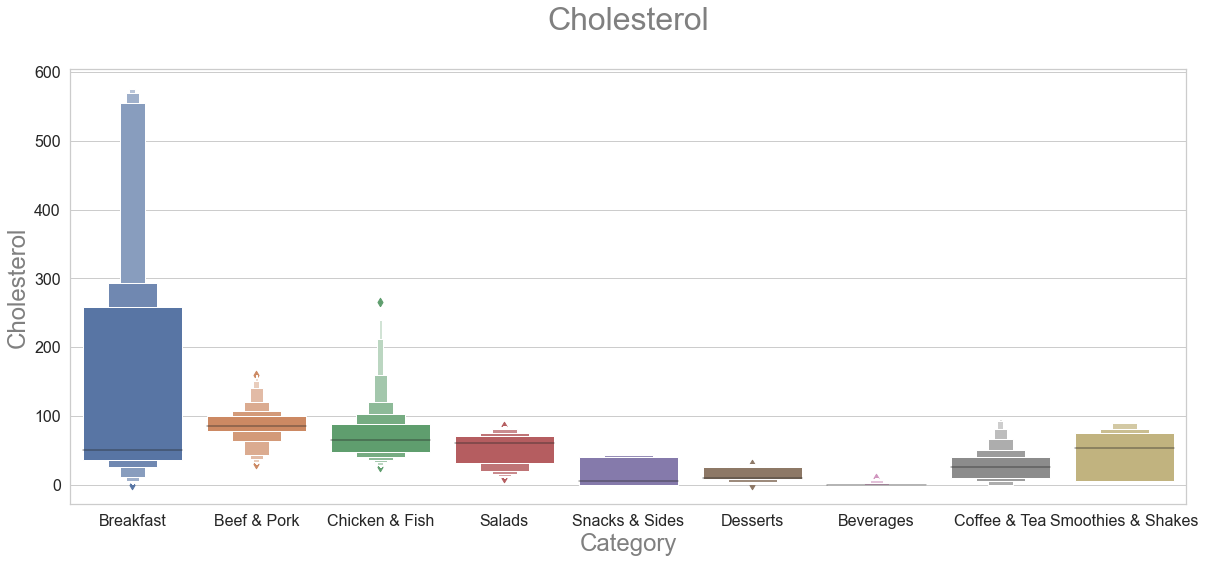

In [23]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Cholesterol', data=menu)

plt.title("Cholesterol\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Cholesterol',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

495.75
190.0


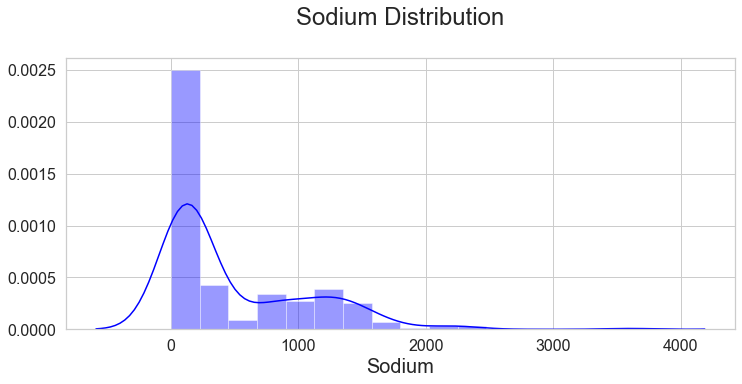

In [24]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Sodium'], color='Blue')

plt.title("Sodium Distribution\n", size=24)
plt.xlabel('Sodium', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Sodium'].mean())
print(menu['Sodium'].median())

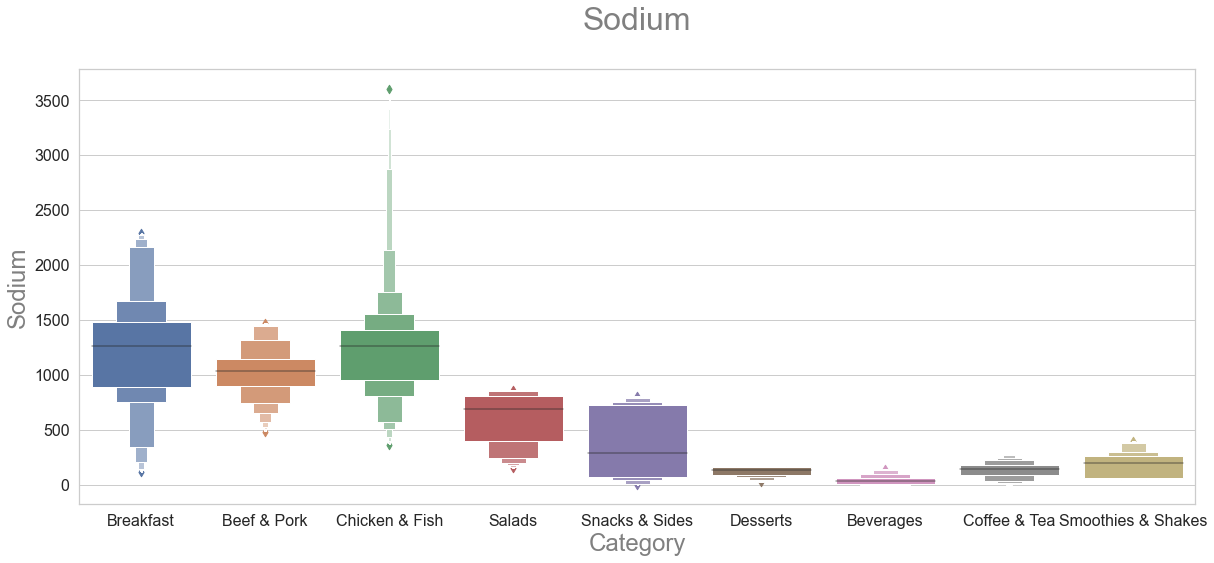

In [25]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Sodium', data=menu)

plt.title("Sodium\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Sodium',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

47.34615384615385
44.0


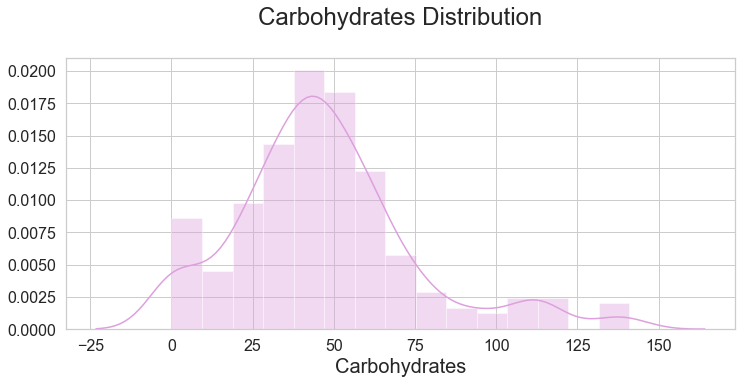

In [26]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Carbohydrates'], color='plum')

plt.title("Carbohydrates Distribution\n", size=24)
plt.xlabel('Carbohydrates', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Carbohydrates'].mean())
print(menu['Carbohydrates'].median())

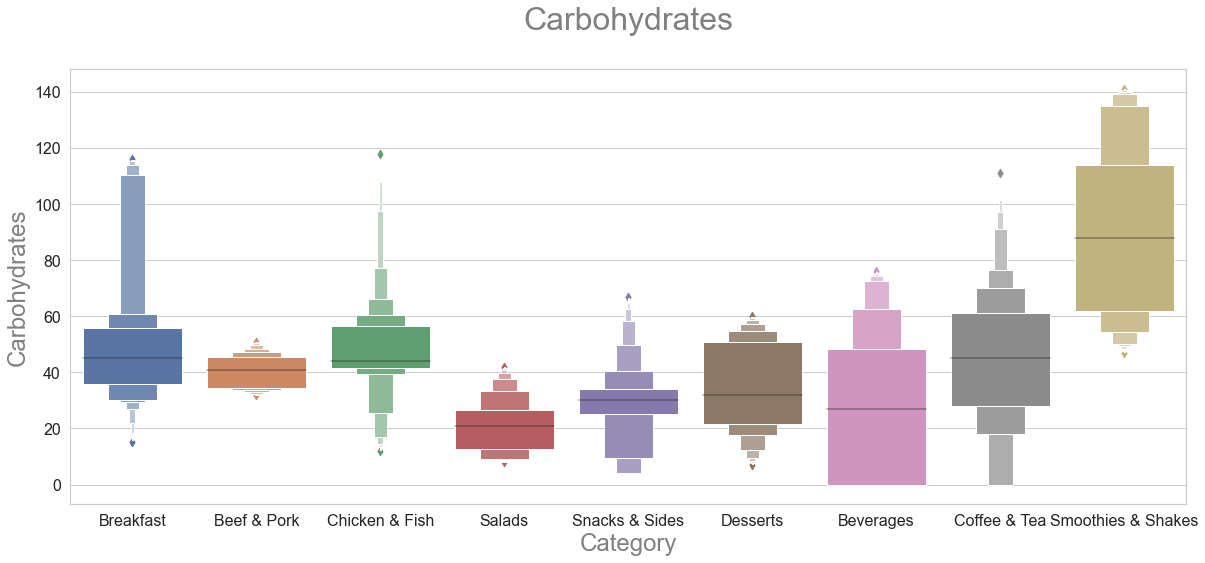

In [27]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Carbohydrates', data=menu)

plt.title("Carbohydrates\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Carbohydrates',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

1.6307692307692307
1.0


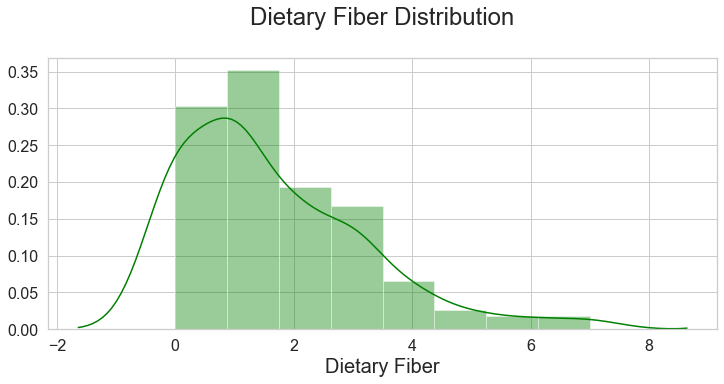

In [28]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Dietary Fiber'], color='green')

plt.title("Dietary Fiber Distribution\n", size=24)
plt.xlabel('Dietary Fiber', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Dietary Fiber'].mean())
print(menu['Dietary Fiber'].median())

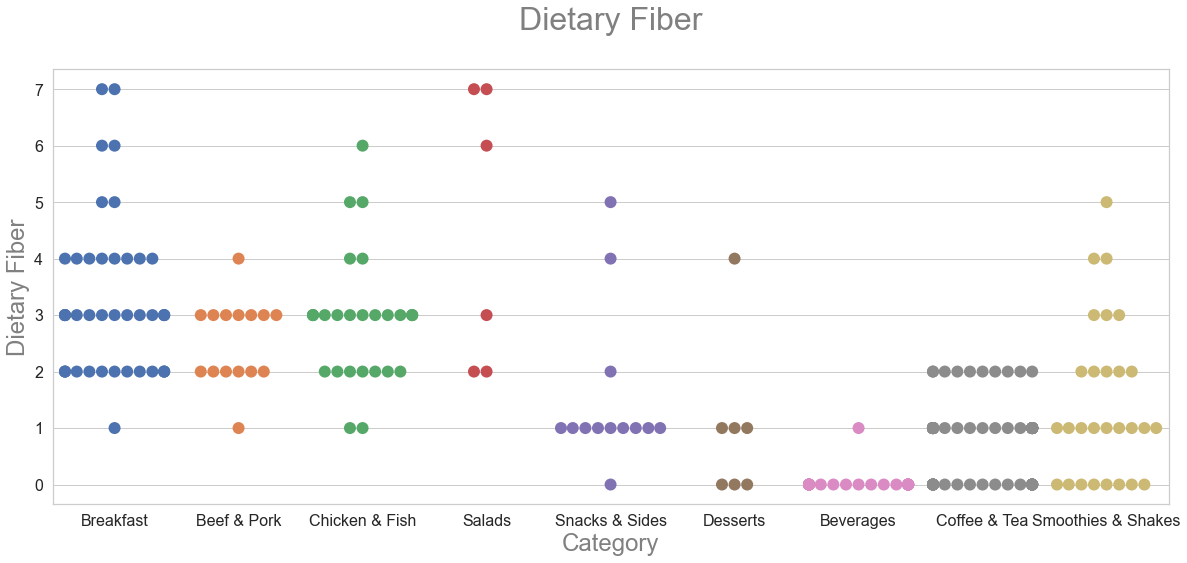

In [29]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Dietary Fiber', data=menu, size=12)

plt.title("Dietary Fiber\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Dietary Fiber', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

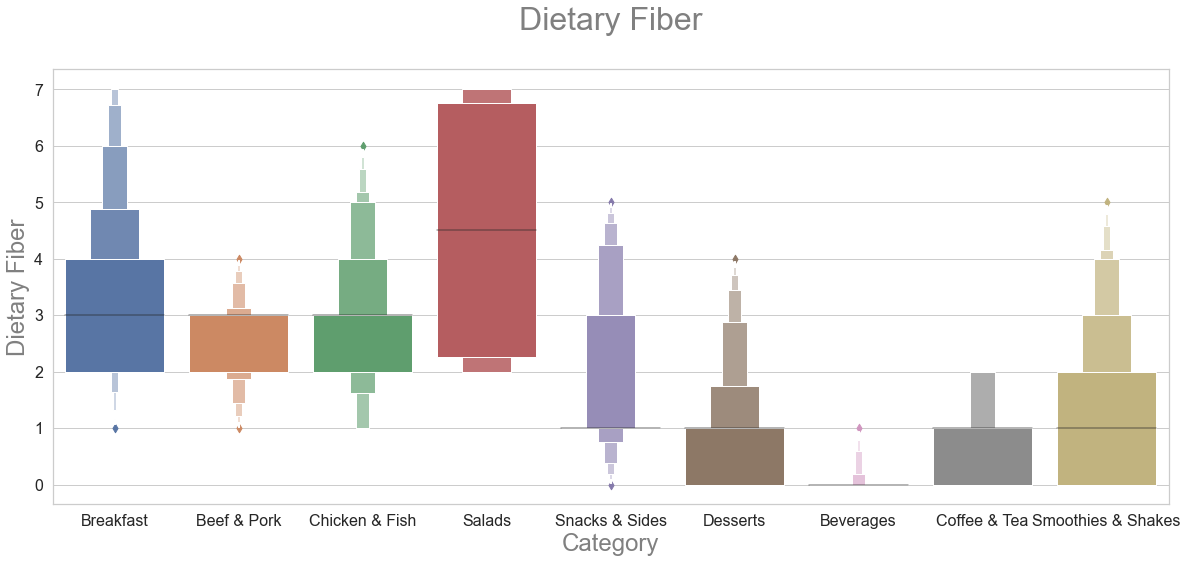

In [30]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='Category', y='Dietary Fiber', data=menu)

plt.title("Dietary Fiber\n", size=32, color='Gray')
plt.xlabel('Category',color='Gray',fontsize=24) 
plt.ylabel('Dietary Fiber',color='Gray',fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

29.423076923076923
17.5


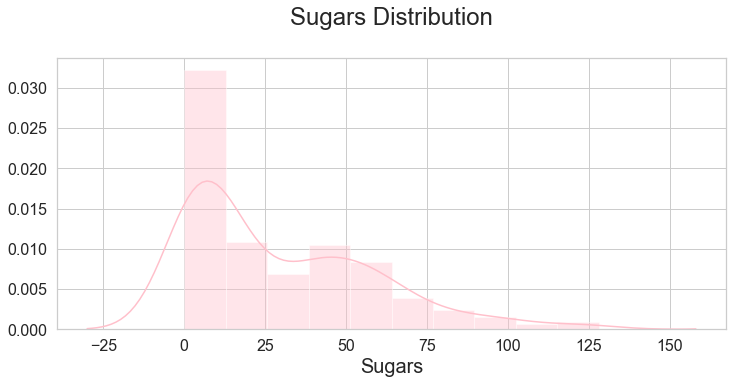

In [31]:
plt.figure(figsize=(12,5))
ax = sns.distplot(menu['Sugars'], color='Pink')

plt.title("Sugars Distribution\n", size=24)
plt.xlabel('Sugars', fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

print(menu['Sugars'].mean())
print(menu['Sugars'].median())

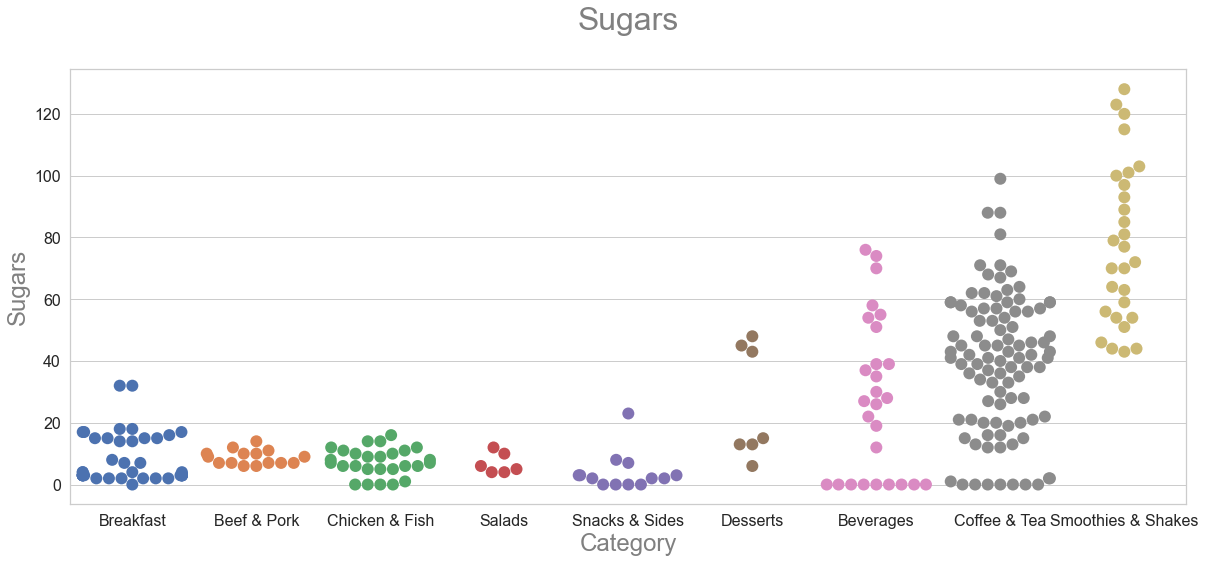

In [32]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Sugars', data=menu, size=12)

plt.title("Sugars\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Sugars', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

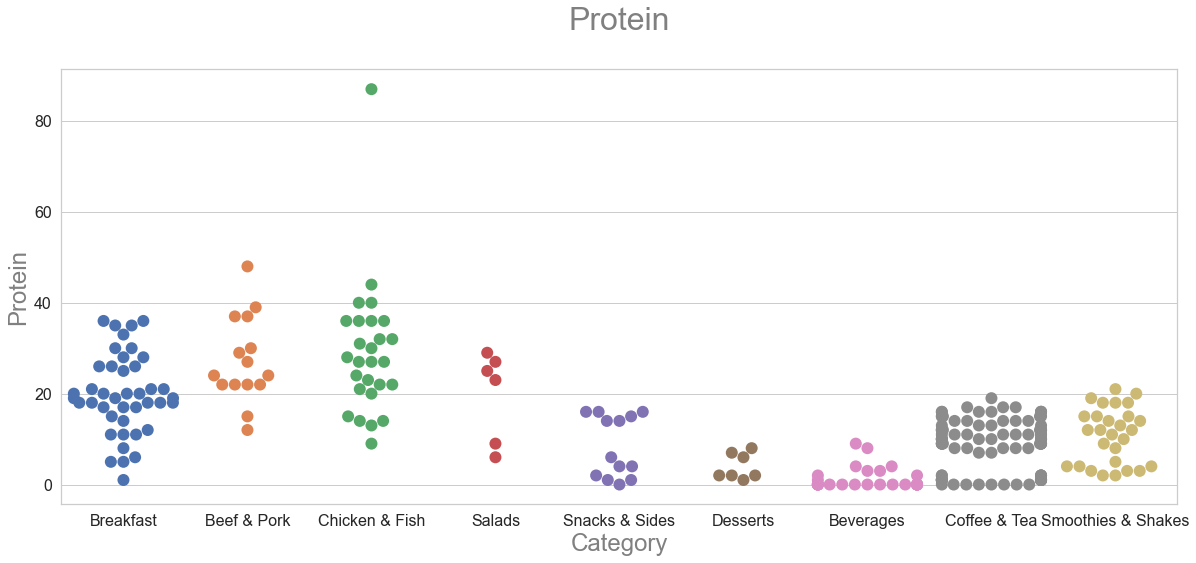

In [33]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='Category', y='Protein', data=menu, size=12)

plt.title("Protein\n", size=32, color='gray')
plt.xlabel('Category', color='gray', fontsize=24)
plt.ylabel('Protein', color='gray', fontsize=24)
plt.xticks(size=16)  
plt.yticks(size=16)

plt.show()

In [34]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

trace = go.Scatter(
    y = menu['Cholesterol (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Cholesterol (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Cholesterol (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Cholesterol (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Cholesterol (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

In [35]:
trace = go.Scatter(
    y = menu['Dietary Fiber (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Dietary Fiber (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Dietary Fiber (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Dietary Fiber (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Dietary Fiber (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Calcium Scatter plots
trace = go.Scatter(
    y = menu['Calcium (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Calcium (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Calcium (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Calcium (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Calcium (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Iron Scatter plots
trace = go.Scatter(
    y = menu['Iron (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Iron (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Iron (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Iron (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Iron (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Vitamin A (% Daily Value) Scatter plots
trace = go.Scatter(
    y = menu['Vitamin A (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Vitamin A (% Daily Value)'].values,
        color = menu['Vitamin A (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Vitamin A (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Vitamin A (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Vitamin C (% Daily Value) Scatter plots
trace = go.Scatter(
    y = menu['Vitamin C (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Vitamin C (% Daily Value)'].values,
        color = menu['Vitamin C (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Vitamin C (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Vitamin C (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

这里使用到位置、大小、颜色作为视觉通道。

In [36]:
x, y = (list(x) for x in zip(*sorted(zip(menu.Calories.values, menu.Item.values), reverse = False)))

trace = go.Bar(
    x=x, y=y, 
    marker=dict(color=x, colorscale='Portland', reversescale = False),
    name='Calories per item',
    orientation='h',
)

layout = dict(
    title='Barplot of all MacDonald Food Items',
    width = 900, height = 2000,
    yaxis=dict(showgrid=False, showline=False, showticklabels=True)
)

fig1 = go.Figure(data=[trace])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [37]:
trace = go.Scatter(
    y = menu['Calories'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        color = menu['Calories'].values,
        colorscale='Portland',
        reversescale = False,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Calories per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Calories',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')